# Método da Bissecção

**A imagem a seguir mostra a expicação teórica do método da bissecção :**

![Teoria](Imagens/Metodo_Bissec%C3%A7%C3%A3o-Teoria.png)

a proxima imagem mostra os passos que o engenheiro deve seguir para aplicar corretamente o método da bissecção

### 1º Passo - Determinação do intervalo

![1ºPasso](Imagens/1%C2%BA%20Passo.png)

Nesse passo atribui-se os valores do intervalo que contem a raíz única a ser descoberta

### 2º Passo - Condições para aplicação do Método

![2ºPasso](Imagens/2%C2%BA%20Passo.png)

Antes de efetuar a aplicação do método, deve-se verificar se 3 pontos:

**1.verificar os valores das funções em a e em b**

        o resultado na multiplicação negativo, contribui para garantir que a raíz está dentro dos intervalos a e b.

    
**2.A função deve ser continua dentro do intervalo**

        A continuidade garantirá dentro do intervalo garantirá 100% a aplicação do método da bissecação.


**3.A sequência de derivadas para função continua deve gerar sempre o mesmo sinal**

        para a aplicação do método a função deve manter o comportamento crescente ou descrecente. isso é identificado após derivar e verificar se o sinal permanece constante.

## Garantindo o 2º Passo pode-se prosseguir para aplicação do método

### 3º Passo - Média dos intervalos

![3ºPasso](Imagens/3%C2%BA%20Passo.png)

Encontra o ponto médio entre a e b para no proximo passo verificar um intervalo menor que contenha a raiz.

### 4º Passo - Verificação das Condições de parada

![4ºPasso](Imagens/4%C2%BA%20Passo.png)

**São duas condições para determinação da parada:**

**1. Encontrando o valor exato da raíz**

        se o valor da raíz encontrada, f(x), ticer o resultado igual a 0, então o algoritmo é encerrado
**2. Aproximação do valor da raíz**
        
        quando o valor da raíz não é exato o algoritmo tentará aproximar-se da raíz com infinitas iterações, para que não utilize todo o poder do processamento do computador de forma desnecessária, atribui-se um valor aproximado considerado tolerável. para esse valor denominamos tolerância.

***OBS: CASO NENHUMA DAS CONDIÇÕES FOREM SATISFEITAS O ALGORITMO CONTINUA SENDO PROCESSADO, DIMINUINDO O INTERVALO ENTRE a E b DETERMINANDO UMA NOVA POSSÍVEL RAIZ ATÉ QUE UMA DAS DUAS CONDIÇÕES A CIMA SEJAM SATISFEITAS.***

### 5º Passo - Verificar qual valor será atualizado

sabendo o novo possivel valor da raiz, deve-se verificar qual o valor de a ou b que será atualizado para repetir o procedimento do algoritmo. quando determinado qual variável será atualizada ela assumirá ela assumirá o novo valor da raiz encontrada. esse procedimento irá diminuirá o intervalo até o ponto que atinja uma das condições de parada. então, como saber qual valor será atualizado?

deve-se verificar as seguintes operações:

$$
\begin{aligned}
1.\ f(a) \cdot f(x_{k}) <0 \\
2.\ f(b) \cdot f(x_{k}) <0
\end{aligned}$$

em relação a 'a': 

Se a multiplicação das funções forem menores que zero, significa que a raiz está entre a e x, logo atualiza b com o valor de x e repete o algoritmo considerando como novo intervalo $[a,b=x]$

em relação a 'b':

Se a multiplicação das funções forem menores que zero, significa que a raiz está entre b e x, logo atualiza a com o valor de x e repete o algoritmo considerando como novo intervalo $[a=x,b]$

# Desenvolvendo o Algoritmo

## Bibliotecas Utilizadas

In [147]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math
import math as m


## Funções

In [148]:
#função que retorna resultado das funções ou retorna sua forma em string para ser renderizada em latex


def f(x,tp):
    inp = 'x * log(x,10) - 1'
    trt = inp.split(' ')

    
    if tp == 1:
        for i in range(len(trt)):
            if 'log' in trt[i]:
                trt[i] = 'np.log(x)/np.log('+trt[i][6:-1]+')'

            elif 'sin' in trt[i] or 'cos' in trt[i] or 'tan' in trt[i]:
                trt[i] = 'np.'+ trt[i]
                
            
        return eval(' '.join(trt))
            
                                            # caso de uma função não linear, devem ser escritas da seguinte maneira: I - np.sin(x) + 2       |       II - np.log(x,10) + np.log(x,2)

    elif tp ==0:
                                         #a string deve corresponder a mesma função do caso acima, porém escrita da seguinte maneira: I - sin(x) + 2     |   II - log10(x) + log2(x) 
        b = sp.sympify(inp)
        return b

# função utilizada se a função a cima apresentada for não linear
def df(x,tp):
    return sp.sin(x) #caso seja utilizado essa função altere a linha  'derivada_f = sp.diff(f(x,1),x)' para ' derivada_f = sp.diff((df(x),x)). Caso contrário desfaça essa operação

        #sp.sin(x)

# imprime variaveis renderizadas
def print_latex(eq):
    return display(Math(eq))


## ANÁLISE GRÁFICA

Considerando o Seguinte intervalo:
 [a,b] = [1,2]
Uma tolerância de
 tol = 0.002
Agora analisa-se o gráfico da função para saber se no intervalo [a,b] ele é contínuo


<string>:1: RuntimeWarning: invalid value encountered in log


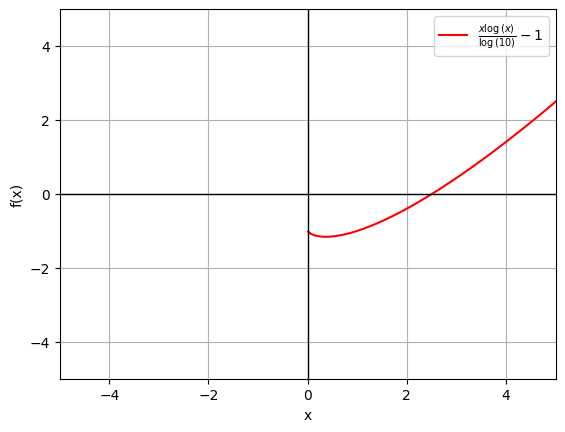

In [149]:
a = 1
b = 2
decimal_places = 3
print('Considerando o Seguinte intervalo:\n [a,b] = [{},{}]'.format(a,b))
print( 'Uma tolerância de\n tol = {}'.format(0.002))
print('Agora analisa-se o gráfico da função para saber se no intervalo [a,b] ele é contínuo')

# determina o domínio da função e as iterações para criar cada ponto no gráfico
x = np.linspace(-10,10,1000)

#analisar se o o intervalo no qual será aplicado o algoritmo é continuo

fig,ax = plt.subplots() #configura a região na qual será apresentado o plot da imagem
ax.grid(True) #apresenta grade no plot da imagem
ax.plot(x,f(x,1),color='red', label='$'+sp.latex(f(x,0))+'$') #plota o gráfico e adiciona algumas configurações de legenda ao mesmo
plt.axhline(0, color='black', lw=1) #acrecenta eixo das abicissas
plt.axvline(0, color='black', lw=1) #acrescenta o eixo das ordenadas



#modifique esses parametros para ter uma visão geral do gráfico
ax.set_xlim(-5,5) # determina o tamanho do eixo x a ser analisado
ax.set_ylim(-5,5) # determina o tamanho do eixo y a ser analisado
    
ax.set_xlabel('x') #acrescenta legenda para o eixo x
ax.set_ylabel('f(x)') #acrescenta legnda para o eixo y
ax.legend() #ativa legenda

plt.show() #mostra o gráfico após as configurações fornecidas acima








**Se a função no intervalo [a,b] fornecidos são visualmente continuos, então continua o processo do algoritmo.caso contrário, deve-se determinar outra função que seja continua no intervalo, pois ocorrerá um erro durante a aplicação do método da bissecção**

Analisando se a derivada no intervalo ela é constante, usando a e b como referência:
Derivada da função: 


<IPython.core.display.Math object>

derivada em a: 


<IPython.core.display.Math object>

derivada em b: 


<IPython.core.display.Math object>

A derivada é sempre crescente, logo o intervalo é válido


<string>:1: RuntimeWarning: invalid value encountered in log


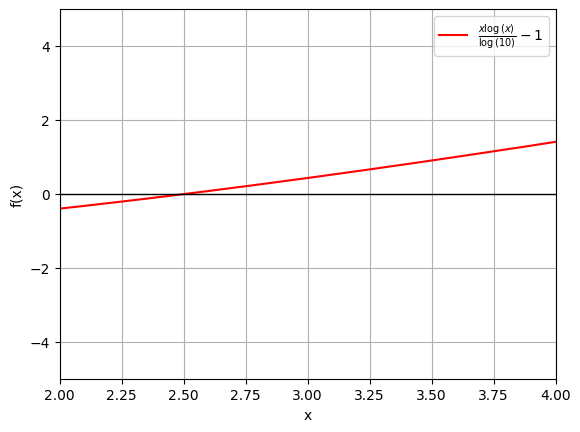

In [150]:
print('Analisando se a derivada no intervalo ela é constante, usando a e b como referência:')
#determina a variável da função para realização de tratamento da função com a bilbioteca sympy
x = sp.symbols('x')
a = 2
b = 4
#obtem a derivada da função
derivada_f = sp.diff(f(x,0),x)

print('Derivada da função: ')
print_latex("f'(x) = "+sp.latex(derivada_f))
while True:
    # verifica se as funções derivadas em a e b são negativas
    if (derivada_f.subs(x,a)) < 0 and derivada_f.subs(x,b) <0:
        print('derivada em a: ')
        print_latex("f'("+str(a)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(a)+')')+ " = " + str(round(derivada_f.subs(x,a),decimal_places)))
        print('derivada em b: ')
        print_latex("f'("+str(b)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(b)+')')+ " = " + str(round(derivada_f.subs(x,b),decimal_places)))
        print('A derivada é sempre descrescente, logo o intervalo é válido')

    #verifica se as funções derivadas de a e b são negativas
    elif (derivada_f.subs(x,a)) > 0 and derivada_f.subs(x,b) >0:
        print('derivada em a: ')
        print_latex("f'("+str(a)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(a)+')')+ " = " + str(round(derivada_f.subs(x,a),decimal_places)))
        print('derivada em b: ')
        print_latex("f'("+str(b)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(b)+')')+ " = " + str(round(derivada_f.subs(x,b),decimal_places)))
        print('A derivada é sempre crescente, logo o intervalo é válido')

    #verifica se as funções derivadas de a e b não satisfazem as duas condições  acima
    else:
        print('derivada em a: ')
        print_latex("f'("+str(a)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(a)+')')+ " = " + str(derivada_f.subs(x,a)))
        print('derivada em b: ')
        print_latex("f'("+str(b)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(b)+')')+ " = " + str(derivada_f.subs(x,b)))
        print('A forma da função varia ao longo do intervalo, logo o intervalo é inválido. Determine outro intervalo')
        break
            


    x = np.linspace(-10,10,1000)
    fig,ax = plt.subplots()
    ax.grid(True)
    ax.plot(x,f(x,1),color='red', label='$'+sp.latex(f(x,0))+'$')
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)

    #modifique esses parametros para verificar se o grafico é continuo nos intervalos iniciais fornecidos
    ax.set_xlim(a,b) # determina o tamanho dos eixos x e y a serem analisados
    ax.set_ylim(-5,5) # determina o tamanho dos eixos x e y a serem analisados
        
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()

    plt.show()

    break

**Para efetuar a aplicação do algoritmo a derivada da função proximo ao local onde está localizada a raíz seve ser sempre crescente ou sempre descrescente no intervalo. Matematicamente falando, a derivada da função proximo no intervalo deve ser constante.**

**se a derivada é constante então continue com a aplicação do algoritmo. Caso contrário, escolha outra função que a derivada seja constante no intervalo, pois ocorrerá um erro na aplicação do método da bissecção.**

## Aplicando Algoritmo

In [151]:
# Aplicando o algoritmo da bissecção

a0 = 2
b0 = 3
tolerance = 0.002
decimal_places = 4


print('fazendo:',end='')
print_latex('f(a) \cdot f(b)')
print('temos então:')


if f(a0,1)*f(b0,1) <0:
    print_latex('f('+str(a0)+')' '\cdot f('+str(b0)+')' '='+ '['+ sp.latex(f(x,0)).replace('x','('+str(a0)+')')+']' + '\cdot' +'['+ sp.latex(f(x,0)).replace('x','('+str(b0)+')')+']'+ " = "+str((f(a0,1)*f(b0,1))))
    print('Ou seja, os intervalos aplicados inicialmente são válidos, pois:',end=' ')
    print_latex('f(a) \cdot f(b) < 0')
    

else:
    print_latex('f('+str(a0)+')' '\cdot f('+str(b0)+')' '='+ '['+ sp.latex(f(x,0)).replace('x','('+str(a0)+')')+']' + '\cdot' +'['+ sp.latex(f(x,0)).replace('x','('+str(b0)+')')+']'+ " = "+str((f(a0,1)*f(b0,1))))
    print('Ou seja, os intervalos aplicados inicialmente NÃO são válidos, pois:',end=' ')
    print_latex('f(a) \cdot f(b) > 0')
    print('Deve-se escolher outra [a,b] pois esse intervalo é inválido')


fazendo:

<IPython.core.display.Math object>

temos então:


<IPython.core.display.Math object>

Ou seja, os intervalos aplicados inicialmente são válidos, pois: 

<IPython.core.display.Math object>

In [152]:
interation = 1
results = []
while True:
    print('efetuando os cálculos: ')
    print("{}º iteração: ".format(interation))
    x = round((a0*f(b0,1) - b0*f(a0,1))/(f(b0,1) - f(a0,1)),decimal_places)
    print('verificando condição de parada: ')

    if abs(round(f(x,1),decimal_places)) <= tolerance or f(x,1) == 0:
        print_latex('f('+str(x)+') = '+ sp.latex(f(x,0)).replace('x',str(x)) + ' = '+ sp.latex(round(f(x,1),decimal_places)))
        print_latex('|f(x)|' + '\leq' + str(tolerance))
        print_latex(sp.latex(abs(round((f(x,1)),decimal_places))) + '\leq ' + str(tolerance))
        print("Dessa forma, a condição  de parada foi satisfeita")
        results.append([interation, round(a0,decimal_places), round(b0,decimal_places), round(f(a0,1),decimal_places), round(f(b0,1),decimal_places), round(x,decimal_places), abs(round(f(x,1),decimal_places))])
        break
    elif abs(round(f(x,1),decimal_places)) > tolerance:
        print_latex('f('+str(x)+') = '+ sp.latex(f(x,0)).replace('x',str(x)) + ' = '+ sp.latex(round(f(x,1),decimal_places)))
        print_latex('|f('+str(x)+')|' + '>' + str(tolerance))
        print_latex(sp.latex(abs(round(f(x,1),decimal_places))) + '>' + str(tolerance))
        #determinar novo intervalo
        print('dessa forma um novo intervalo deve ser determinado: ')
        if f(a0,1)*f(x,1) < 0:
            print('como a relação: ')
            print_latex('f(a) \cdot f(x) < 0')
            print('então b será atualizado. Dessa forma tem-se:')
            a0 = a0
            b0 = x
            print_latex('a = a = '+str(a))
            print_latex('b = x = '+str(x))

        elif f(b0,1)*f(x,1) < 0:
            print('como a relação: ')
            print_latex('f(b) \cdot f(x) < 0')
            print('então a será atualizado. Dessa forma tem-se:')
            b0 = b0
            a0 = x
            print_latex('a = x = '+str(x))
            print_latex('b = a = '+str(b))

    
    
    
    results.append([interation, round(a0,decimal_places), round(b0,decimal_places), round(f(a0,1),decimal_places), round(f(b0,1),decimal_places), round(x,decimal_places), abs(round(f(x,1),decimal_places))])
    interation+=1
    if interation > 60:
        break

    #para esse método deve-se ter cuidado com o arredondamento, pois ao utilizar determinado tipo de arrendondamento as o intervalo nunca
    #será mudado e consequentemente nunca irá convergir.






efetuando os cálculos: 
1º iteração: 
2.4798
verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então a será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
2º iteração: 
2.505
verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Dessa forma, a condição  de parada foi satisfeita


In [153]:
from tabulate import tabulate

train_data_element = tabulate(results, headers=['K', 'a_k', 'b_k', 'f(a_k)', 'f(b_k)', 'x_k+1','|f(x_k+1)|'], tablefmt='heavy_grid')


In [154]:
print(train_data_element)

┏━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃   K ┃    a_k ┃   b_k ┃   f(a_k) ┃   f(b_k) ┃   x_k+1 ┃   |f(x_k+1)| ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   1 ┃ 2.4798 ┃     3 ┃  -0.0219 ┃   0.4314 ┃  2.4798 ┃       0.0219 ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   2 ┃ 2.4798 ┃     3 ┃  -0.0219 ┃   0.4314 ┃  2.505  ┃       0.001  ┃
┗━━━━━┻━━━━━━━━┻━━━━━━━┻━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━━━━━━┛
